In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


#read in the data

df = pd.read_csv(r'C:\Users\Peej\Desktop\movies.csv')



In [3]:
#Lets have a glimpse of the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check for missing data 
# I decide to loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#create a new dataframe wihtout the nulls

df_no_nulls = df.dropna()


In [32]:
#checking for nulls in the new data fram df_no_nulls

for col in df_no_nulls.columns:
    pct_missing = np.mean(df_no_nulls[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [ ]:
# Now that there are no null values, I proceed to the next step of data cleaning

In [8]:
#change the data types of the budget and gross columns so they don't have the redundant .0

df_no_nulls['budget'] = df_no_nulls['budget'].astype('int64')
                                    
df_no_nulls['gross'] = df_no_nulls['gross'].astype('int64')

#glimpse data in df_no_nulls

df_no_nulls.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
# year and released columns should show the same year but they dont 
# I decide to start a new year column by taking the first four digits in the released column

df_no_nulls['year'] = df_no_nulls['released'].str.split(', ').str[1].str[:5]

df_no_nulls.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [29]:
# I want to order data by gross desc

df_no_nulls = df_no_nulls.sort_values(by=['gross'], inplace = False, ascending = False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,29,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,39,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,17,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,35,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,38,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


In [12]:
pd.set_option('display.max_rows', None)

In [30]:
#Drop any duplicates

#df.drop_duplicates()


In [14]:
#Now that the data is cleaned, my question is: what VARIABLE correlated to gross revenue? I come up with two hypotheses that has no basis whatsoever in theory or fact

#H1: Budget has high correlation with gross revenue
#H2: Company has high correlation with gross revenue 

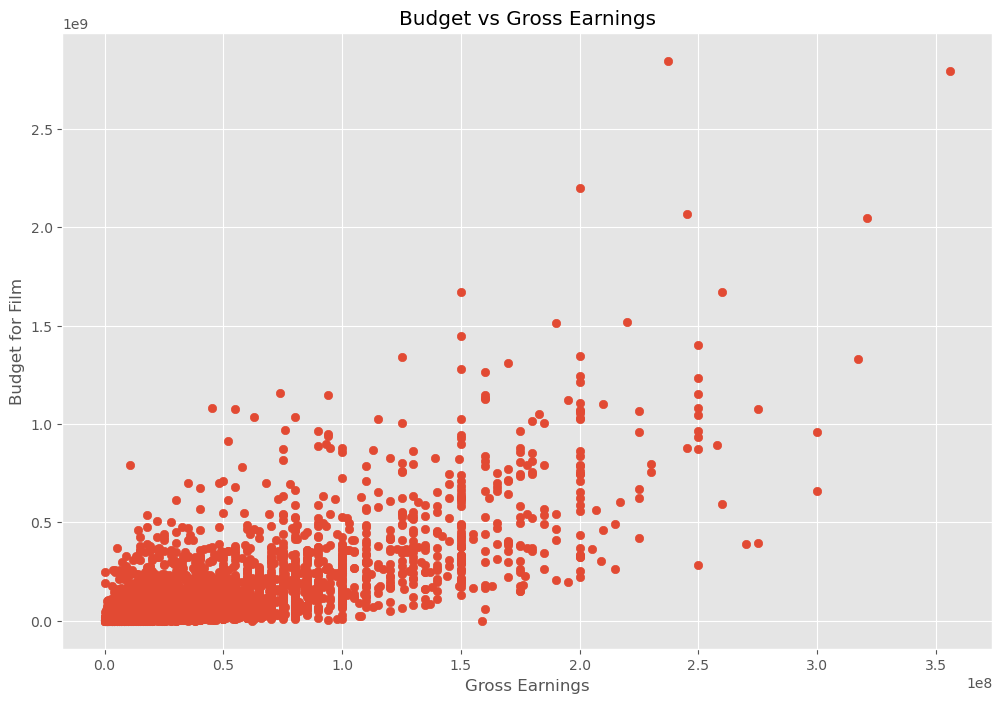

In [15]:
#to test h1 out, I first plot a scatter plot to see if there is any relationship between the two variables
#I could find out the coefficient but I'd like to flex my visualization skills

plt.scatter(x = df_no_nulls['budget'], y = df_no_nulls['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [ ]:
#Data looks abit clustered. I now plot budget vs gross using seaborn to get a trendline.

<AxesSubplot:xlabel='budget', ylabel='gross'>

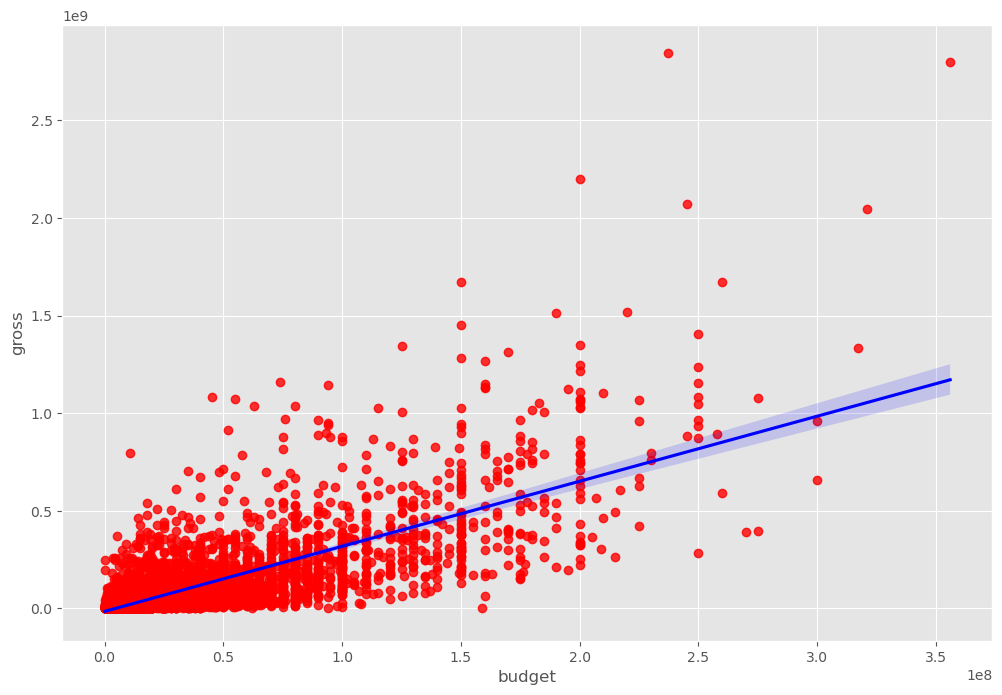

In [17]:
sns.regplot(x = 'budget', y = 'gross', data = df_no_nulls, scatter_kws={"color" : "red"}, line_kws = {"color" : "blue"})

In [18]:
# Having plot the relationship, I now want to find out its a correlation coefficient 

In [19]:
df_no_nulls.corr(method = 'pearson') #Pearson, Kendall, Spearman

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [20]:
# There is a high correlation between budget and gross revenue
# I would like to visualize this via correlation matrix

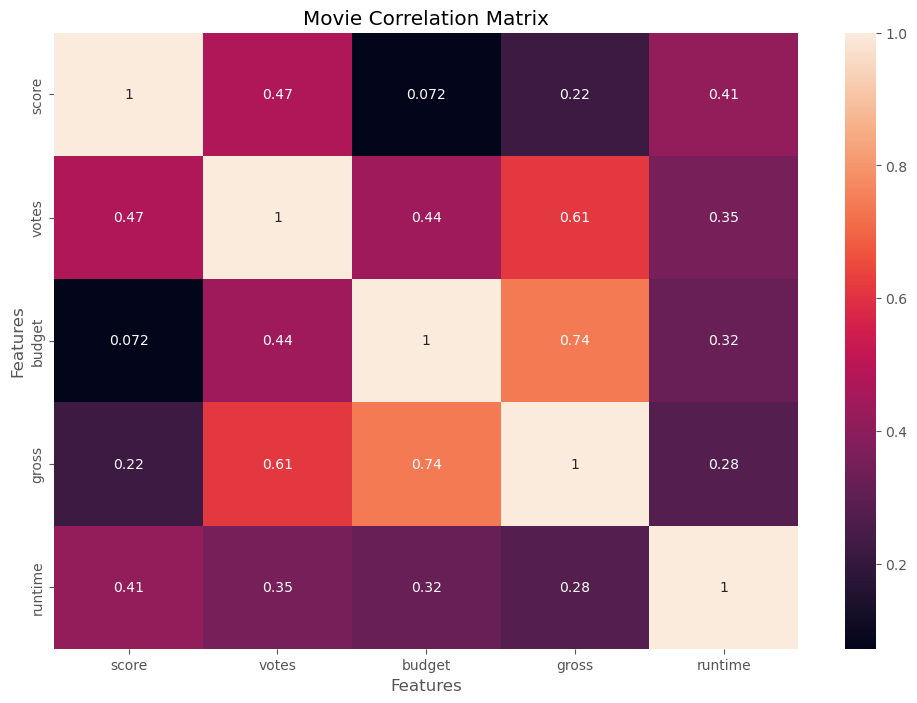

In [21]:
correlation_matrix = df_no_nulls.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.scatter(x = df_no_nulls['budget'], y = df_no_nulls['gross'])

plt.title('Movie Correlation Matrix')

plt.xlabel('Features')

plt.ylabel('Features')

plt.show()



In [22]:
# Now I would like to test out H2:There will be a positive correlation between companies and gross revenue

# To do that I want to assign a number to each company

df_assigned = df_no_nulls

for col_name in df_assigned.columns:
    if(df_assigned[col_name].dtype == 'object'):
        df_assigned[col_name] = df_assigned[col_name].astype('category')
        df_assigned[col_name] = df_assigned[col_name].cat.codes
        
df_assigned.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,29,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,39,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,17,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,35,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,38,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


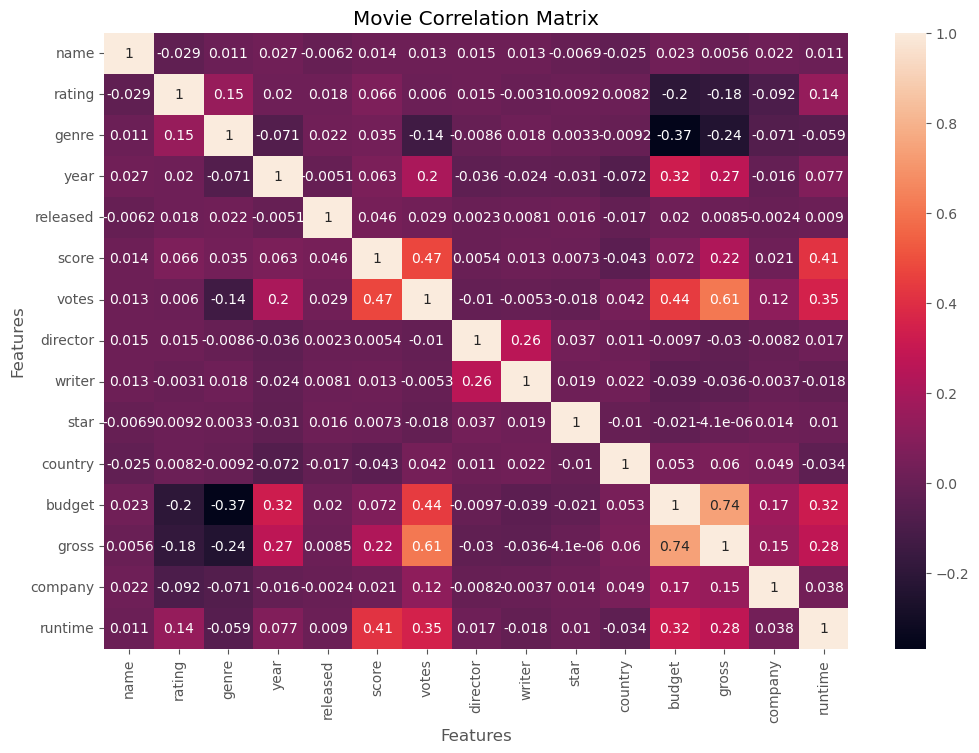

In [23]:
correlation_matrix = df_assigned.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Movie Correlation Matrix')

plt.xlabel('Features')

plt.ylabel('Features')

plt.show()


In [24]:
corr_mat = df_assigned.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.026759
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019560
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [25]:
sorted_set = corr_pairs.sort_values()

sorted_set

budget    genre      -0.368523
genre     budget     -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
gross     rating     -0.181906
rating    gross      -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
year      country    -0.072407
country   year       -0.072407
genre     company    -0.071334
company   genre      -0.071334
year      genre      -0.070699
genre     year       -0.070699
          runtime    -0.059237
runtime   genre      -0.059237
score     country    -0.043051
country   score      -0.043051
writer    budget     -0.039466
budget    writer     -0.039466
writer    gross      -0.035885
gross     writer     -0.035885
director  year       -0.035738
year      director   -0.035738
runtime   country    -0.034477
country   runtime    -0.034477
year      star       -0.030840
star      year       -0.030840
director

In [26]:
# filter out the values that do not have the requisite correlation coefficient (.5)

req_corr = sorted_set[(sorted_set) > 0.5]

req_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [27]:
# Threfore H1 is accepted and H2 is rejected, companies are not correlated to gross revenue 
# However, from the list of correlations that we can see above, votes seem to be correlated to gross revenue
# Conclusion: budget and votes are positively correlated to gross revenue 